In [1]:
! codecarbon init


Welcome to CodeCarbon, here is your experiment id:
f75c09b5-77b7-4240-9ebc-f1832e011a3a (from ./.codecarbon.config)



In [5]:
import sys
sys.path.append("/Users/wesleymonteith/opt/anaconda3/lib/python3.8/site-packages/codecarbon/")

In [6]:
from emissions_tracker import EmissionsTracker

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
import torch
import numpy as np
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
class IntelPowerGadget:
    """
        Set up IntePowerGadget software and associated path.
        Create a command line using this path to run the software.
        Create a csv file with all the results inside.
        Parameters can be modified like : duration / resolution / log_file_name
    """
    _osx_exec = "PowerLog"
    _osx_exec_backup = "/Applications/Intel Power Gadget/PowerLog"
    _windows_exec = "PowerLog3.0.exe"
    _windows_exec_backup = "C:\\Program Files\\Intel\\Power Gadget 3.6\\PowerLog3.0.exe"
    def __init__(
        self,
        output_dir: str = ".",
        duration=10,
        resolution=1000,
        log_file_name=".\\Data\\CPU_log_infos.csv",
    ):
        self._log_file_path = os.path.join(output_dir, log_file_name)
        self._system = sys.platform.lower()
        self._duration = duration
        self._resolution = resolution
        self._setup_cli()

    def _setup_cli(self):
        """
        Setup cli command to run Intel Power Gadget using the path
        """
        if self._system.startswith("win"):
            if shutil.which(self._windows_exec):
                self._cli = shutil.which(
                    self._windows_exec
                )  # Windows exec is a relative path
            elif shutil.which(self._windows_exec_backup):
                self._cli = self._windows_exec_backup
            else:
                raise FileNotFoundError(
                    f"Intel Power Gadget executable not found on {self._system}"
                )
        elif self._system.startswith("darwin"):
            if shutil.which(self._osx_exec):
                self._cli = self._osx_exec
            elif shutil.which(self._osx_exec_backup):
                self._cli = self._osx_exec_backup
            else:
                raise FileNotFoundError(
                    f"Intel Power Gadget executable not found on {self._system}"
                )
        else:
            raise SystemError("Platform not supported by Intel Power Gadget")


    def _log_values(self):
        """
        Logs output from Intel Power Gadget command line to a file using PowerLog3.0
        Put the results in Data\CPU_log_infos.csv
        The command line executed here is the cli created by the setup_cli function.
        """
        returncode = None
        if self._system.startswith("win"):
            returncode = subprocess.call(
                [
                    self._cli,
                    "-duration",
                    str(self._duration),
                    "-resolution",
                    str(self._resolution),
                    "-file",
                    self._log_file_path,
                ],
                shell=True,
                stdout=subprocess.PIPE,
                stderr=subprocess.PIPE,
            )
        elif self._system.startswith("darwin"):
            returncode = subprocess.call(
                f"'{self._cli}' -duration {self._duration} -resolution {self._resolution} -file {self._log_file_path} > /dev/null",  # noqa: E501
                shell=True,
            )
        else:
            return None

In [9]:
tracker = EmissionsTracker()
tracker.start()
X = np.random.randn(10000, 5000)
y = np.random.randn(10000)
reg = LinearRegression().fit(X, y)
tracker.stop()
emissions: float = tracker.stop()
print(emissions)

[codecarbon INFO @ 20:31:18] [setup] RAM Tracking...
[codecarbon INFO @ 20:31:18] [setup] GPU Tracking...
[codecarbon INFO @ 20:31:18] No GPU found.
[codecarbon INFO @ 20:31:18] [setup] CPU Tracking...
[codecarbon INFO @ 20:31:18] Tracking Intel CPU via Power Gadget
[codecarbon INFO @ 20:31:19] >>> Tracker's metadata:
[codecarbon INFO @ 20:31:19]   Platform system: macOS-10.16-x86_64-i386-64bit
[codecarbon INFO @ 20:31:19]   Python version: 3.8.13
[codecarbon INFO @ 20:31:19]   Available RAM : 8.000 GB
[codecarbon INFO @ 20:31:19]   CPU count: 8
[codecarbon INFO @ 20:31:19]   CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz
[codecarbon INFO @ 20:31:19]   GPU count: None
[codecarbon INFO @ 20:31:19]   GPU model: None
[codecarbon WARNING @ 20:31:53] Background scheduler didn't run for a long period (30s), results might be inaccurate
[codecarbon WARNING @ 20:31:53] Background scheduler didn't run for a long period (30s), results might be inaccurate
[codecarbon INFO @ 20:31:53] Energy c

KeyboardInterrupt: 

In [15]:
df = pd.read_csv("intel_power_gadget_log.csv")

In [9]:
df.iloc[0:12]

,System Time,RDTSC,Elapsed Time (sec),CPU Utilization(%),CPU Frequency_0(MHz),CPU Min Frequency_0(MHz),CPU Max Frequency_0(MHz),CPU Requsted Frequency_0(MHz),Processor Power_0(Watt),Cumulative Processor Energy_0(Joules),...,Package Temperature_0(C),Package Hot_0,CPU Min Temperature_0(C),CPU Max Temperature_0(C),DRAM Power_0(Watt),Cumulative DRAM Energy_0(Joules),Cumulative DRAM Energy_0(mWh),Package Power Limit_0(Watt),GT Frequency(MHz),GT Requsted Frequency(MHz)
0,17:57:21:210,1.460765e+12,0.103,16.447,1385.0,1100.0,2000.0,1386.0,3.560,0.366,...,73.0,0.0,71.0,73.0,1.100,0.113,0.031,15.0,0.0,0.0
1,17:57:21:325,1.460925e+12,0.218,13.028,1382.0,1100.0,2000.0,1392.0,2.924,0.703,...,72.0,0.0,70.0,72.0,0.914,0.218,0.061,15.0,0.0,0.0
2,17:57:21:431,1.461074e+12,0.324,13.455,1889.0,1100.0,3300.0,1926.0,4.237,1.154,...,73.0,0.0,70.0,76.0,0.992,0.324,0.090,15.0,0.0,0.0
3,17:57:21:538,1.461222e+12,0.431,10.116,1272.0,1100.0,2800.0,1250.0,2.230,1.392,...,72.0,0.0,70.0,73.0,0.831,0.413,0.115,15.0,0.0,0.0
4,17:57:21:648,1.461375e+12,0.541,10.236,1343.0,1100.0,1700.0,1347.0,2.616,1.679,...,72.0,0.0,70.0,72.0,0.972,0.519,0.144,15.0,0.0,0.0
5,17:57:21:757,1.461526e+12,0.650,9.638,1272.0,1100.0,1700.0,1282.0,2.163,1.914,...,72.0,0.0,70.0,72.0,0.742,0.600,0.167,15.0,0.0,0.0
6,17:57:21:865,1.461677e+12,0.758,9.579,1239.0,1100.0,1700.0,1246.0,2.159,2.148,...,72.0,0.0,70.0,72.0,0.737,0.680,0.189,15.0,0.0,0.0
7,17:57:21:974,1.461829e+12,0.867,12.228,1235.0,1100.0,1700.0,1236.0,2.309,2.400,...,72.0,0.0,70.0,72.0,0.709,0.757,0.210,15.0,0.0,0.0
8,17:57:22:081,1.461978e+12,0.974,14.491,1320.0,1100.0,1700.0,1334.0,2.733,2.693,...,72.0,0.0,70.0,72.0,0.862,0.850,0.236,15.0,500.0,500.0
9,17:57:22:190,1.462129e+12,1.083,8.908,1312.0,1100.0,1700.0,1317.0,2.095,2.920,...,72.0,0.0,69.0,72.0,0.639,0.919,0.255,15.0,0.0,0.0


In [10]:
df.columns

Index(['System Time', 'RDTSC', 'Elapsed Time (sec)', 'CPU Utilization(%)',
       'CPU Frequency_0(MHz)', 'CPU Min Frequency_0(MHz)',
       'CPU Max Frequency_0(MHz)', 'CPU Requsted Frequency_0(MHz)',
       'Processor Power_0(Watt)', 'Cumulative Processor Energy_0(Joules)',
       'Cumulative Processor Energy_0(mWh)', 'IA Power_0(Watt)',
       'Cumulative IA Energy_0(Joules)', 'Cumulative IA Energy_0(mWh)',
       'Package Temperature_0(C)', 'Package Hot_0', 'CPU Min Temperature_0(C)',
       'CPU Max Temperature_0(C)', 'DRAM Power_0(Watt)',
       'Cumulative DRAM Energy_0(Joules)', 'Cumulative DRAM Energy_0(mWh)',
       'Package Power Limit_0(Watt)', 'GT Frequency(MHz)',
       'GT Requsted Frequency(MHz)'],
      dtype='object')

In [19]:
type(df.iloc[0,0])

str

In [13]:
df['System Time'] = df['System Time'].apply(lambda x: pd.to_datetime(x, errors = 'coerce'))

In [14]:
df

,System Time,RDTSC,Elapsed Time (sec),CPU Utilization(%),CPU Frequency_0(MHz),CPU Min Frequency_0(MHz),CPU Max Frequency_0(MHz),CPU Requsted Frequency_0(MHz),Processor Power_0(Watt),Cumulative Processor Energy_0(Joules),...,Package Temperature_0(C),Package Hot_0,CPU Min Temperature_0(C),CPU Max Temperature_0(C),DRAM Power_0(Watt),Cumulative DRAM Energy_0(Joules),Cumulative DRAM Energy_0(mWh),Package Power Limit_0(Watt),GT Frequency(MHz),GT Requsted Frequency(MHz)
0,NaT,1.460765e+12,0.103,16.447,1385.0,1100.0,2000.0,1386.0,3.560,0.366,...,73.0,0.0,71.0,73.0,1.100,0.113,0.031,15.0,0.0,0.0
1,NaT,1.460925e+12,0.218,13.028,1382.0,1100.0,2000.0,1392.0,2.924,0.703,...,72.0,0.0,70.0,72.0,0.914,0.218,0.061,15.0,0.0,0.0
2,NaT,1.461074e+12,0.324,13.455,1889.0,1100.0,3300.0,1926.0,4.237,1.154,...,73.0,0.0,70.0,76.0,0.992,0.324,0.090,15.0,0.0,0.0
3,NaT,1.461222e+12,0.431,10.116,1272.0,1100.0,2800.0,1250.0,2.230,1.392,...,72.0,0.0,70.0,73.0,0.831,0.413,0.115,15.0,0.0,0.0
4,NaT,1.461375e+12,0.541,10.236,1343.0,1100.0,1700.0,1347.0,2.616,1.679,...,72.0,0.0,70.0,72.0,0.972,0.519,0.144,15.0,0.0,0.0
5,NaT,1.461526e+12,0.650,9.638,1272.0,1100.0,1700.0,1282.0,2.163,1.914,...,72.0,0.0,70.0,72.0,0.742,0.600,0.167,15.0,0.0,0.0
6,NaT,1.461677e+12,0.758,9.579,1239.0,1100.0,1700.0,1246.0,2.159,2.148,...,72.0,0.0,70.0,72.0,0.737,0.680,0.189,15.0,0.0,0.0
7,NaT,1.461829e+12,0.867,12.228,1235.0,1100.0,1700.0,1236.0,2.309,2.400,...,72.0,0.0,70.0,72.0,0.709,0.757,0.210,15.0,0.0,0.0
8,NaT,1.461978e+12,0.974,14.491,1320.0,1100.0,1700.0,1334.0,2.733,2.693,...,72.0,0.0,70.0,72.0,0.862,0.850,0.236,15.0,500.0,500.0
9,NaT,1.462129e+12,1.083,8.908,1312.0,1100.0,1700.0,1317.0,2.095,2.920,...,72.0,0.0,69.0,72.0,0.639,0.919,0.255,15.0,0.0,0.0


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

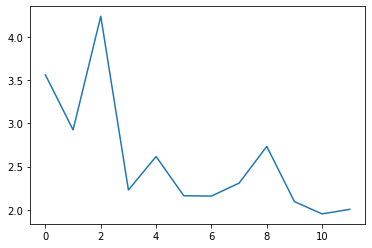

In [23]:
plt.plot(df['Processor Power_0(Watt)'])

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [11]:
X = np.random.randn(40000, 5000)
y = np.random.randn(40000)

In [12]:
reg = LinearRegression().fit(X, y)

In [13]:
df = pd.read_csv("PwrData_2022-12-3_20-59-23.csv")

In [30]:
df.columns

Index(['System Time', 'RDTSC', 'Elapsed Time (sec)', 'CPU Utilization(%)',
       'CPU Frequency_0(MHz)', 'CPU Min Frequency_0(MHz)',
       'CPU Max Frequency_0(MHz)', 'CPU Requsted Frequency_0(MHz)',
       'Processor Power_0(Watt)', 'Cumulative Processor Energy_0(Joules)',
       'Cumulative Processor Energy_0(mWh)', 'IA Power_0(Watt)',
       'Cumulative IA Energy_0(Joules)', 'Cumulative IA Energy_0(mWh)',
       'Package Temperature_0(C)', 'Package Hot_0', 'CPU Min Temperature_0(C)',
       'CPU Max Temperature_0(C)', 'DRAM Power_0(Watt)',
       'Cumulative DRAM Energy_0(Joules)', 'Cumulative DRAM Energy_0(mWh)',
       'Package Power Limit_0(Watt)', 'GT Frequency(MHz)',
       'GT Requsted Frequency(MHz)'],
      dtype='object')

In [27]:
plot_data = df.iloc[0:844]

In [25]:
import seaborn as sns

<AxesSubplot:xlabel='Elapsed Time (sec)', ylabel='Cumulative Processor Energy_0(mWh)'>

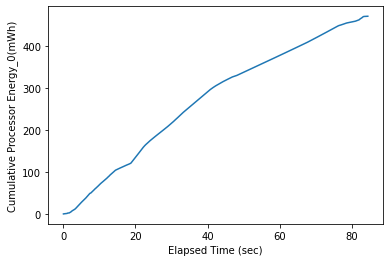

In [28]:
sns.lineplot(data=plot_data, x="Elapsed Time (sec)", y="Cumulative Processor Energy_0(mWh)")

<AxesSubplot:xlabel='Elapsed Time (sec)', ylabel='Processor Power_0(Watt)'>

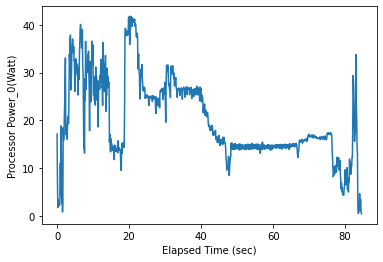

In [34]:
sns.lineplot(data=plot_data, x="Elapsed Time (sec)", y="Processor Power_0(Watt)")

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
import shutil
import os
import subprocess

class IntelPowerGadget:
    # https://stackoverflow.com/questions/72086226/intelpowergadget-how-to-get-specific-information-of-my-cpu
    """
        Set up IntePowerGadget software and associated path.
        Create a command line using this path to run the software.
        Create a csv file with all the results inside.
        Parameters can be modified like : duration / resolution / log_file_name
    """
    _osx_exec = "PowerLog"
    _osx_exec_backup = "/Applications/Intel Power Gadget/PowerLog"
    _windows_exec = "PowerLog3.0.exe"
    _windows_exec_backup = "C:\\Program Files\\Intel\\Power Gadget 3.6\\PowerLog3.0.exe"
    def __init__(
        self,
        output_dir: str = ".",
        duration=10,
        resolution=1000,
        log_file_name=".\\Data\\CPU_log_infos.csv",
    ):
        self._log_file_path = os.path.join(output_dir, log_file_name)
        self._system = sys.platform.lower()
        self._duration = duration
        self._resolution = resolution
        self._setup_cli()

    def _setup_cli(self):
        """
        Setup cli command to run Intel Power Gadget using the path
        """
        if self._system.startswith("win"):
            if shutil.which(self._windows_exec):
                self._cli = shutil.which(
                    self._windows_exec
                )  # Windows exec is a relative path
            elif shutil.which(self._windows_exec_backup):
                self._cli = self._windows_exec_backup
            else:
                raise FileNotFoundError(
                    f"Intel Power Gadget executable not found on {self._system}"
                )
        elif self._system.startswith("darwin"):
            if shutil.which(self._osx_exec):
                self._cli = self._osx_exec
            elif shutil.which(self._osx_exec_backup):
                self._cli = self._osx_exec_backup
            else:
                raise FileNotFoundError(
                    f"Intel Power Gadget executable not found on {self._system}"
                )
        else:
            raise SystemError("Platform not supported by Intel Power Gadget")


    def _log_values(self):
        """
        Logs output from Intel Power Gadget command line to a file using PowerLog3.0
        Put the results in Data\CPU_log_infos.csv
        The command line executed here is the cli created by the setup_cli function.
        """
        returncode = None
        if self._system.startswith("win"):
            returncode = subprocess.call(
                [
                    self._cli,
                    "-duration",
                    str(self._duration),
                    "-resolution",
                    str(self._resolution),
                    "-file",
                    self._log_file_path,
                ],
                shell=True,
                stdout=subprocess.PIPE,
                stderr=subprocess.PIPE,
            )
        elif self._system.startswith("darwin"):
            returncode = subprocess.call(
                f"'{self._cli}' -duration {self._duration} -resolution {self._resolution} -file {self._log_file_path} > /dev/null",  # noqa: E501
                shell=True,
            )
        else:
            return None

In [104]:
IPG = IntelPowerGadget(duration=2,
                    resolution=1000,
                    output_dir ='logs',
                    log_file_name='qlkeurhgliq.csv')

X = np.random.randn(1000, 50)
y = np.random.randn(1000)

In [105]:
reg = LinearRegression().fit(X, y)

In [106]:
IPG._setup_cli()
reg = LinearRegression().fit(X, y)
IPG._log_values()

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('logs/.DataCPU_log_infos.csv')

In [ ]:
df

In [56]:
df

,System Time,RDTSC,Elapsed Time (sec),CPU Utilization(%),CPU Frequency_0(MHz),CPU Min Frequency_0(MHz),CPU Max Frequency_0(MHz),CPU Requsted Frequency_0(MHz),Processor Power_0(Watt),Cumulative Processor Energy_0(Joules),...,Package Temperature_0(C),Package Hot_0,CPU Min Temperature_0(C),CPU Max Temperature_0(C),DRAM Power_0(Watt),Cumulative DRAM Energy_0(Joules),Cumulative DRAM Energy_0(mWh),Package Power Limit_0(Watt),GT Frequency(MHz),GT Requsted Frequency(MHz)
0,22:33:24:501,2.451630e+13,1.002,0.371,1216.0,1100.0,1600.0,1200.0,5.785,5.795,...,54.0,0.0,51.0,52.0,0.940,0.941,0.262,15.0,0.0,0.0
1,22:33:25:517,2.451771e+13,2.017,0.580,1278.0,1100.0,1700.0,1277.0,2.543,8.378,...,54.0,0.0,51.0,52.0,0.880,1.835,0.510,15.0,500.0,500.0
2,22:33:26:520,2.451911e+13,3.021,0.587,1279.0,1100.0,1700.0,1277.0,2.244,10.629,...,53.0,0.0,51.0,53.0,0.828,2.666,0.741,15.0,500.0,500.0
3,22:33:27:525,2.452051e+13,4.026,0.621,1293.0,1100.0,1700.0,1309.0,2.138,12.779,...,53.0,0.0,50.0,53.0,0.834,3.505,0.973,15.0,0.0,0.0
4,Total Elapsed Time (sec) = 4.026145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Measured RDTSC Frequency (GHz) = 1.392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Cumulative Package Energy_0 (Joules) = 12.779297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cumulative Package Energy_0 (mWh) = 3.549805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Average Package Power_0 (Watt) = 3.174078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Cumulative IA Energy_0 (Joules) = 7.533936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.dropna(inplace=True)

In [59]:
df

,System Time,RDTSC,Elapsed Time (sec),CPU Utilization(%),CPU Frequency_0(MHz),CPU Min Frequency_0(MHz),CPU Max Frequency_0(MHz),CPU Requsted Frequency_0(MHz),Processor Power_0(Watt),Cumulative Processor Energy_0(Joules),...,Package Temperature_0(C),Package Hot_0,CPU Min Temperature_0(C),CPU Max Temperature_0(C),DRAM Power_0(Watt),Cumulative DRAM Energy_0(Joules),Cumulative DRAM Energy_0(mWh),Package Power Limit_0(Watt),GT Frequency(MHz),GT Requsted Frequency(MHz)
0,22:33:24:501,2.451630e+13,1.002,0.371,1216.0,1100.0,1600.0,1200.0,5.785,5.795,...,54.0,0.0,51.0,52.0,0.940,0.941,0.262,15.0,0.0,0.0
1,22:33:25:517,2.451771e+13,2.017,0.580,1278.0,1100.0,1700.0,1277.0,2.543,8.378,...,54.0,0.0,51.0,52.0,0.880,1.835,0.510,15.0,500.0,500.0
2,22:33:26:520,2.451911e+13,3.021,0.587,1279.0,1100.0,1700.0,1277.0,2.244,10.629,...,53.0,0.0,51.0,53.0,0.828,2.666,0.741,15.0,500.0,500.0
3,22:33:27:525,2.452051e+13,4.026,0.621,1293.0,1100.0,1700.0,1309.0,2.138,12.779,...,53.0,0.0,50.0,53.0,0.834,3.505,0.973,15.0,0.0,0.0


In [62]:
df = pd.read_csv('logs/.DataCPU_log_infos.csv').dropna()
df.columns

Index(['System Time', 'RDTSC', 'Elapsed Time (sec)', 'CPU Utilization(%)',
       'CPU Frequency_0(MHz)', 'CPU Min Frequency_0(MHz)',
       'CPU Max Frequency_0(MHz)', 'CPU Requsted Frequency_0(MHz)',
       'Processor Power_0(Watt)', 'Cumulative Processor Energy_0(Joules)',
       'Cumulative Processor Energy_0(mWh)', 'IA Power_0(Watt)',
       'Cumulative IA Energy_0(Joules)', 'Cumulative IA Energy_0(mWh)',
       'Package Temperature_0(C)', 'Package Hot_0', 'CPU Min Temperature_0(C)',
       'CPU Max Temperature_0(C)', 'DRAM Power_0(Watt)',
       'Cumulative DRAM Energy_0(Joules)', 'Cumulative DRAM Energy_0(mWh)',
       'Package Power Limit_0(Watt)', 'GT Frequency(MHz)',
       'GT Requsted Frequency(MHz)'],
      dtype='object')

In [87]:
df['Cumulative Processor Energy_0(mWh)'].iloc[-1]

3.55

In [92]:
os.path.join("test","ya")

'test/ya'

In [149]:
get_cpu_features()

{'CPU_count': 8,
 'CPU_vendor_id': 'GenuineIntel',
 'CPU_GHz': 1.4,
 'core_architecture': 'x86_64'}

In [150]:
import platform

uname = platform.uname()
print(f"System: {uname.system}")
print(f"Node Name: {uname.node}")
print(f"Release: {uname.release}")
print(f"Version: {uname.version}")
print(f"Machine: {uname.machine}")
print(f"Processor: {uname.processor}")

System: Darwin
Node Name: tsf-500-wpa-6-072.epfl.ch
Release: 21.6.0
Version: Darwin Kernel Version 21.6.0: Wed Aug 10 14:25:27 PDT 2022; root:xnu-8020.141.5~2/RELEASE_X86_64
Machine: x86_64
Processor: i386


In [ ]:
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))

In [96]:
import platform
platform.processor()

'i386'

In [117]:
import re
float(re.findall("\d+\.\d+", '1.4000 GHz')[0])

1.4

In [ ]:
class Hardware:
    def __init__(self) -> None:
        pass
    
    def get_features(self):
        pass 

In [ ]:
class CPUinfo:
    def __init__(self) -> None:
        pass
    def get_features(self):
        pass

In [ ]:
class GPUinfo:
    def __init__(self) -> None:
        pass
    def get_features(self):
        pass

In [63]:
import psutil

psutil.cpu_count()

8

In [64]:
psutil.cpu_count(logical=True)

8

In [65]:
psutil.cpu_count(logical=False)

4

In [67]:
import platform

uname = platform.uname()
print(f"System: {uname.system}")
print(f"Node Name: {uname.node}")
print(f"Release: {uname.release}")
print(f"Version: {uname.version}")
print(f"Machine: {uname.machine}")
print(f"Processor: {uname.processor}")

System: Darwin
Node Name: tsf-500-wpa-6-072.epfl.ch
Release: 21.6.0
Version: Darwin Kernel Version 21.6.0: Wed Aug 10 14:25:27 PDT 2022; root:xnu-8020.141.5~2/RELEASE_X86_64
Machine: x86_64
Processor: i386


In [68]:
from datetime import datetime

In [69]:
# Boot Time
print("="*40, "Boot Time", "="*40)
boot_time_timestamp = psutil.boot_time()
bt = datetime.fromtimestamp(boot_time_timestamp)
print(f"Boot Time: {bt.year}/{bt.month}/{bt.day} {bt.hour}:{bt.minute}:{bt.second}")

======================================== Boot Time ========================================
Boot Time: 2022/12/3 17:40:32


In [70]:
def get_size(bytes, suffix="B"):
    """
    Scale bytes to its proper format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor

In [143]:
kuefgqiueh = psutil.virtual_memory()
kuefgqiueh.available

2181554176

In [153]:
def get_memory_features():
    mem = psutil.virtual_memory()
    swap = psutil.swap_memory()
    return {
        "memory_available_B" : mem.available,
        "swap_free_B" : swap.free
    }

In [154]:
get_memory_features()

{'memory_available_B': 2102169600, 'swap_free_B': 681312256}

In [133]:
# Memory Information
print("="*40, "Memory Information", "="*40)
# get the memory details
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}")
print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}")
print(f"Percentage: {svmem.percent}%")
print("="*20, "SWAP", "="*20)
# get the swap memory details (if exists)
swap = psutil.swap_memory()
print(f"Total: {get_size(swap.total)}")
print(f"Free: {get_size(swap.free)}")
print(f"Used: {get_size(swap.used)}")
print(f"Percentage: {swap.percent}%")

======================================== Memory Information ========================================
Total: 8.00GB
Available: 1.90GB
Used: 4.26GB
Percentage: 76.3%
==================== SWAP ====================
Total: 3.00GB
Free: 1.05GB
Used: 1.95GB
Percentage: 65.0%


In [73]:
# Disk Information
print("="*40, "Disk Information", "="*40)
print("Partitions and Usage:")
# get all disk partitions
partitions = psutil.disk_partitions()
for partition in partitions:
    print(f"=== Device: {partition.device} ===")
    print(f"  Mountpoint: {partition.mountpoint}")
    print(f"  File system type: {partition.fstype}")
    try:
        partition_usage = psutil.disk_usage(partition.mountpoint)
    except PermissionError:
        # this can be catched due to the disk that
        # isn't ready
        continue
    print(f"  Total Size: {get_size(partition_usage.total)}")
    print(f"  Used: {get_size(partition_usage.used)}")
    print(f"  Free: {get_size(partition_usage.free)}")
    print(f"  Percentage: {partition_usage.percent}%")
# get IO statistics since boot
disk_io = psutil.disk_io_counters()
print(f"Total read: {get_size(disk_io.read_bytes)}")
print(f"Total write: {get_size(disk_io.write_bytes)}")

======================================== Disk Information ========================================
Partitions and Usage:
=== Device: /dev/disk1s1s1 ===
  Mountpoint: /
  File system type: apfs
  Total Size: 112.71GB
  Used: 108.49GB
  Free: 4.22GB
  Percentage: 96.3%
=== Device: /dev/disk1s5 ===
  Mountpoint: /System/Volumes/VM
  File system type: apfs
  Total Size: 112.71GB
  Used: 108.49GB
  Free: 4.22GB
  Percentage: 96.3%
=== Device: /dev/disk1s3 ===
  Mountpoint: /System/Volumes/Preboot
  File system type: apfs
  Total Size: 112.71GB
  Used: 108.49GB
  Free: 4.22GB
  Percentage: 96.3%
=== Device: /dev/disk1s6 ===
  Mountpoint: /System/Volumes/Update
  File system type: apfs
  Total Size: 112.71GB
  Used: 108.49GB
  Free: 4.22GB
  Percentage: 96.3%
=== Device: /dev/disk1s2 ===
  Mountpoint: /System/Volumes/Data
  File system type: apfs
  Total Size: 112.71GB
  Used: 108.49GB
  Free: 4.22GB
  Percentage: 96.3%
Total read: 39.26GB
Total write: 38.37GB


In [75]:
psutil.sensors_battery()

sbattery(percent=91, secsleft=15960, power_plugged=False)

In [77]:
psutil.sensors_fan() # Revolutions Per Minuteof the fans
#psutil.sensors_temperatures() # various devices' temperatures.

AttributeError: module 'psutil' has no attribute 'sensors_fan'

In [80]:
import tabulate

# GPU information
import GPUtil
from tabulate import tabulate
print("="*40, "GPU Details", "="*40)
gpus = GPUtil.getGPUs()
list_gpus = []
for gpu in gpus:
    # get the GPU id
    gpu_id = gpu.id
    # name of GPU
    gpu_name = gpu.name
    # get % percentage of GPU usage of that GPU
    gpu_load = f"{gpu.load*100}%"
    # get free memory in MB format
    gpu_free_memory = f"{gpu.memoryFree}MB"
    # get used memory
    gpu_used_memory = f"{gpu.memoryUsed}MB"
    # get total memory
    gpu_total_memory = f"{gpu.memoryTotal}MB"
    # get GPU temperature in Celsius
    gpu_temperature = f"{gpu.temperature} °C"
    gpu_uuid = gpu.uuid
    list_gpus.append((
        gpu_id, gpu_name, gpu_load, gpu_free_memory, gpu_used_memory,
        gpu_total_memory, gpu_temperature, gpu_uuid
    ))

print(tabulate(list_gpus, headers=("id", "name", "load", "free memory", "used memory", "total memory",
                                   "temperature", "uuid")))

list_gpus

======================================== GPU Details ========================================
id    name    load    free memory    used memory    total memory    temperature    uuid
----  ------  ------  -------------  -------------  --------------  -------------  ------


[]

======================================== GPU Details ========================================
  id  name                                          load    free memory    used memory    total memory    temperature    uuid
----  --------------------------------------------  ------  -------------  -------------  --------------  -------------  ----------------------------------------
   0  NVIDIA GeForce GTX 1660 Ti with Max-Q Design  0.0%    5991.0MB       0.0MB          6144.0MB        47.0 °C        GPU-8c99117a-b4bb-bce3-d18a-32754c4ef767
[(0,
  'NVIDIA GeForce GTX 1660 Ti with Max-Q Design',
  '0.0%',
  '5991.0MB',
  '0.0MB',
  '6144.0MB',
  '47.0 °C',
  'GPU-8c99117a-b4bb-bce3-d18a-32754c4ef767')]

In [ ]:
GPUtil.getGPUs() 
# >>> 

In [155]:
def get_GPU_features():
    """If GPU is available, returns relevant GPU features used to create a energy consumption DataFrame"""
    # TODO: Add more relevant features
    if len(GPUtil.getGPUs()) != 0:
        return {
            "GPU_name" : GPUtil.getGPUs()[0].name
        }

In [ ]:
extract_energy()

In [157]:
get_cpu_features()

{'CPU_count': 8,
 'CPU_vendor_id': 'GenuineIntel',
 'CPU_GHz': 1.4,
 'core_architecture': 'x86_64'}

In [158]:
get_GPU_features()

In [159]:
get_memory_features()

{'memory_available_B': 2358484992, 'swap_free_B': 714866688}

In [160]:
get_system_features()

{'os': 'Darwin'}

In [161]:
dall = {}
for d in [get_cpu_features(), get_memory_features(), get_system_features()]:
  dall.update(d)
dall

{'CPU_count': 8,
 'CPU_vendor_id': 'GenuineIntel',
 'CPU_GHz': 1.4,
 'core_architecture': 'x86_64',
 'memory_available_B': 2235686912,
 'swap_free_B': 748421120,
 'os': 'Darwin'}

In [164]:
list(dall.keys())

['CPU_count',
 'CPU_vendor_id',
 'CPU_GHz',
 'core_architecture',
 'memory_available_B',
 'swap_free_B',
 'os']

In [176]:
list(dall.keys()) + ["Cumul_Proc_Energy_0(mWh)"]

['CPU_count',
 'CPU_vendor_id',
 'CPU_GHz',
 'core_architecture',
 'memory_available_B',
 'swap_free_B',
 'os',
 'Cumul_Proc_Energy_0(mWh)']

In [177]:
data_subset = pd.DataFrame([],columns=list(dall.keys()) + ["Cumul_Proc_Energy_0(mWh)"])

In [178]:
data_subset

,CPU_count,CPU_vendor_id,CPU_GHz,core_architecture,memory_available_B,swap_free_B,os,Cumul_Proc_Energy_0(mWh)


In [179]:
list(dall.values())

[8, 'GenuineIntel', 1.4, 'x86_64', 2235686912, 748421120, 'Darwin']

In [186]:
data_subset.loc[3] = list(dall.values()) + [extract_energy('logs/tkt.csv')]

In [187]:
data_subset

,CPU_count,CPU_vendor_id,CPU_GHz,core_architecture,memory_available_B,swap_free_B,os,Cumul_Proc_Energy_0(mWh)
0,8,GenuineIntel,1.4,x86_64,2235686912,748421120,Darwin,4.57
1,8,GenuineIntel,1.4,x86_64,2235686912,748421120,Darwin,4.57
2,8,GenuineIntel,1.4,x86_64,2235686912,748421120,Darwin,4.57
3,8,GenuineIntel,1.4,x86_64,2235686912,748421120,Darwin,4.57


In [ ]:
df.loc["Saanvi"] = [96, 90]

In [2]:
import pandas as pd
from os.path import join

In [41]:
model_feat_gui = pd.read_csv(join("data", "Model_features08-15-31_guillaume.csv"))
sub_data_gui = pd.read_csv(join("data", "sub_dataset_energy07-40-32_guillaume.csv"))

model_feat_nico = pd.read_csv(join("data", "Model_features08-12-18_nico.csv"))
sub_data_nico = pd.read_csv(join("data", "sub_dataset_energy07-57-54_nico.csv"))

In [7]:
model_feat_gui

,Unnamed: 0,CPU_count,CPU_vendor_id,CPU_GHz,core_architecture,memory_available_B,swap_free_B,os,model_name,nb_samples,nb_preds
0,0,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,ARDRegression,20,20
1,1,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,ARDRegression,500,20
2,2,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,ARDRegression,500,500
3,3,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,ARDRegression,2000,20
4,4,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,ARDRegression,2000,500
...,...,...,...,...,...,...,...,...,...,...,...
175,175,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,TweedieRegressor,500,20
176,176,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,TweedieRegressor,500,500
177,177,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,TweedieRegressor,2000,20
178,178,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,TweedieRegressor,2000,500


In [8]:
sub_data_gui

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,python_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud
0,2022-12-04T07:40:39,codecarbon,5be7c574-62bf-4f7f-bca4-3c26650d7295,2.765524,3.434548e-09,0.000001,6.010833,0.0,6.0,5.258620e-08,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,NaN,NaN,6.607,46.488,16.0,machine,N
1,2022-12-04T07:40:42,codecarbon,5be7c574-62bf-4f7f-bca4-3c26650d7295,5.492230,5.508538e-09,0.000001,9.225167,0.0,6.0,9.099534e-08,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,NaN,NaN,6.607,46.488,16.0,machine,N
2,2022-12-04T07:40:45,codecarbon,5be7c574-62bf-4f7f-bca4-3c26650d7295,8.523137,4.239638e-08,0.000005,7.908583,0.0,6.0,7.293426e-07,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,NaN,NaN,6.607,46.488,16.0,machine,N
3,2022-12-04T07:40:48,codecarbon,5be7c574-62bf-4f7f-bca4-3c26650d7295,11.287943,4.451944e-08,0.000004,7.543167,0.0,6.0,7.654725e-07,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,NaN,NaN,6.607,46.488,16.0,machine,N
4,2022-12-04T07:40:51,codecarbon,5be7c574-62bf-4f7f-bca4-3c26650d7295,14.192130,6.427950e-08,0.000005,7.910750,0.0,6.0,1.107549e-06,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,NaN,NaN,6.607,46.488,16.0,machine,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2022-12-04T08:15:19,codecarbon,5be7c574-62bf-4f7f-bca4-3c26650d7295,2082.835205,1.718155e-04,0.000082,7.758000,0.0,6.0,2.562254e-03,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,NaN,NaN,6.607,46.488,16.0,machine,N
176,2022-12-04T08:15:22,codecarbon,5be7c574-62bf-4f7f-bca4-3c26650d7295,2085.624409,1.718189e-04,0.000082,8.634833,0.0,6.0,2.562315e-03,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,NaN,NaN,6.607,46.488,16.0,machine,N
177,2022-12-04T08:15:25,codecarbon,5be7c574-62bf-4f7f-bca4-3c26650d7295,2088.399146,1.718236e-04,0.000082,13.615833,0.0,6.0,2.562413e-03,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,NaN,NaN,6.607,46.488,16.0,machine,N
178,2022-12-04T08:15:28,codecarbon,5be7c574-62bf-4f7f-bca4-3c26650d7295,2091.169771,1.718273e-04,0.000082,9.529417,0.0,6.0,2.562482e-03,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,NaN,NaN,6.607,46.488,16.0,machine,N


In [10]:
sub_data_gui.columns

Index(['timestamp', 'project_name', 'run_id', 'duration', 'emissions',
       'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'energy_consumed', 'country_name',
       'country_iso_code', 'region', 'cloud_provider', 'cloud_region', 'os',
       'python_version', 'cpu_count', 'cpu_model', 'gpu_count', 'gpu_model',
       'longitude', 'latitude', 'ram_total_size', 'tracking_mode', 'on_cloud'],
      dtype='object')

In [31]:
energy_consumed = list(sub_data_gui["energy_consumed"])

In [32]:
energy_consumed

[1.0450304034683441e-07,
 1.6760836874997177e-07,
 1.2899953794976075e-06,
 1.354593730739973e-06,
 1.9558335854333863e-06,
 1.5055973657010884e-05,
 1.511780193662754e-05,
 1.5181515398235237e-05,
 1.5453711441462792e-05,
 1.5525218251055037e-05,
 1.597635844834977e-05,
 2.895180785657632e-05,
 2.900257761642889e-05,
 2.904868276259414e-05,
 2.911499039599189e-05,
 2.9202742840989874e-05,
 2.93406763784753e-05,
 2.968278235793114e-05,
 2.990889420991143e-05,
 3.0163417517437984e-05,
 6.627918890680428e-05,
 6.654058280510483e-05,
 6.846198337840263e-05,
 0.0012108689250551,
 0.0012110814483015,
 0.0012111550873313,
 0.0012115140977131,
 0.0012115925415044,
 0.001211903273915,
 0.0012175214188739,
 0.0012176248473984,
 0.0012177032809446,
 0.0012186401456472,
 0.0012187195076129,
 0.0012198755974816,
 0.0012252721813375,
 0.0012254110869984,
 0.0012255763766227,
 0.0012303183219172,
 0.0012304839579175,
 0.001240542694418,
 0.001389750429999,
 0.0013898045564193,
 0.0013898573671164,
 

In [33]:
energy_consumed.reverse()
for i in range(0, len(energy_consumed)-1):
    energy_consumed[i] -=  energy_consumed[i+1]
energy_consumed.reverse()

In [38]:
import pandas as pd

In [45]:
def extract_energy_consumed(sub_data:pd.DataFrame)->list:
    """Extract the column of a sub data set produced with a codecarbon framework"""
    energy_consumed = list(sub_data["energy_consumed"])
    energy_consumed.reverse()
    for i in range(0, len(energy_consumed)-1):
        energy_consumed[i] -=  energy_consumed[i+1] # Normalise the energy as it is cumulative
    energy_consumed.reverse()
    return energy_consumed

In [40]:
def add_energy_col(data_set:pd.DataFrame, energy:list)-> pd.DataFrame:
    """add the consumed energy to a dataframe of predictors"""
    data_set['energy_consumed'] = energy
    return data_set

In [34]:
energy_consumed

[1.0450304034683441e-07,
 6.310532840313736e-08,
 1.1223870107476357e-06,
 6.45983512423656e-08,
 6.012398546934131e-07,
 1.3100140071577499e-05,
 6.182827961665499e-08,
 6.371346160769737e-08,
 2.7219604322755525e-07,
 7.150680959224512e-08,
 4.511401972947317e-07,
 1.2975449408226552e-05,
 5.076975985257053e-08,
 4.610514616524861e-08,
 6.630763339775201e-08,
 8.77524449979828e-08,
 1.3793353748542525e-07,
 3.4210597945584037e-07,
 2.2611185198028832e-07,
 2.545233075265553e-07,
 3.61157713893663e-05,
 2.6139389830054957e-07,
 1.921400573297796e-06,
 0.0011424069416766972,
 2.1252324640006967e-07,
 7.363902979995278e-08,
 3.5901038180014347e-07,
 7.844379129985993e-08,
 3.10732410599944e-07,
 5.618144958900121e-06,
 1.0342852449995131e-07,
 7.84335461999526e-08,
 9.36864702600097e-07,
 7.936196569986904e-08,
 1.156089868700142e-06,
 5.396583855900002e-06,
 1.3890566090001173e-07,
 1.6528962429990766e-07,
 4.741945294499958e-06,
 1.6563600030005537e-07,
 1.0058736500499982e-05,
 0.000

In [35]:
len(energy_consumed)

180

In [36]:
model_feat_gui['energy_consumed'] = energy_consumed

In [37]:
model_feat_gui

,Unnamed: 0,CPU_count,CPU_vendor_id,CPU_GHz,core_architecture,memory_available_B,swap_free_B,os,model_name,nb_samples,nb_preds,energy_consumed
0,0,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,ARDRegression,20,20,1.045030e-07
1,1,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,ARDRegression,500,20,6.310533e-08
2,2,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,ARDRegression,500,500,1.122387e-06
3,3,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,ARDRegression,2000,20,6.459835e-08
4,4,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,ARDRegression,2000,500,6.012399e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,TweedieRegressor,500,20,9.700243e-08
176,176,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,TweedieRegressor,500,500,1.035984e-07
177,177,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,TweedieRegressor,2000,20,1.402873e-07
178,178,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,TweedieRegressor,2000,500,1.128654e-07


In [ ]:
sub_data_gui["energy_consumed"] = sub_data_gui["energy_consumed"].

In [43]:
model_feat_nico

,Unnamed: 0,CPU_count,CPU_vendor_id,CPU_GHz,core_architecture,memory_available_B,swap_free_B,os,model_name,nb_samples,nb_preds
0,0,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,ARDRegression,20,20
1,1,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,ARDRegression,500,20
2,2,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,ARDRegression,500,500
3,3,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,ARDRegression,2000,20
4,4,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,ARDRegression,2000,500
...,...,...,...,...,...,...,...,...,...,...,...
167,167,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,TweedieRegressor,500,20
168,168,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,TweedieRegressor,500,500
169,169,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,TweedieRegressor,2000,20
170,170,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,TweedieRegressor,2000,500


In [44]:
sub_data_nico

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,python_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud
0,2022-12-04T07:57:56,codecarbon,96bf6e95-74c8-457e-9e26-9c15cbc770a6,0.125343,2.798661e-08,0.000223,22.5,2.074,0.085330,7.833928e-07,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,1,1 x NVIDIA GeForce GTX 1660 Ti with Max-Q Design,6.607,46.488,15.814472,process,N
1,2022-12-04T07:57:56,codecarbon,96bf6e95-74c8-457e-9e26-9c15cbc770a6,0.173339,3.853397e-08,0.000222,22.5,2.113,0.085653,1.083371e-06,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,1,1 x NVIDIA GeForce GTX 1660 Ti with Max-Q Design,6.607,46.488,15.814472,process,N
2,2022-12-04T07:57:59,codecarbon,96bf6e95-74c8-457e-9e26-9c15cbc770a6,2.587340,5.811086e-07,0.000225,22.5,2.045,0.088984,1.617088e-05,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,1,1 x NVIDIA GeForce GTX 1660 Ti with Max-Q Design,6.607,46.488,15.814472,process,N
3,2022-12-04T07:57:59,codecarbon,96bf6e95-74c8-457e-9e26-9c15cbc770a6,2.642341,5.931685e-07,0.000224,22.5,2.045,0.089051,1.651463e-05,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,1,1 x NVIDIA GeForce GTX 1660 Ti with Max-Q Design,6.607,46.488,15.814472,process,N
4,2022-12-04T07:57:59,codecarbon,96bf6e95-74c8-457e-9e26-9c15cbc770a6,3.160340,7.093401e-07,0.000224,22.5,2.038,0.090310,1.975213e-05,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,1,1 x NVIDIA GeForce GTX 1660 Ti with Max-Q Design,6.607,46.488,15.814472,process,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,2022-12-04T08:12:18,codecarbon,96bf6e95-74c8-457e-9e26-9c15cbc770a6,861.604908,1.992370e-04,0.000231,22.5,2.949,0.098298,5.384937e-03,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,1,1 x NVIDIA GeForce GTX 1660 Ti with Max-Q Design,6.607,46.488,15.814472,process,N
168,2022-12-04T08:12:18,codecarbon,96bf6e95-74c8-457e-9e26-9c15cbc770a6,861.713907,1.992618e-04,0.000231,22.5,2.868,0.098431,5.385618e-03,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,1,1 x NVIDIA GeForce GTX 1660 Ti with Max-Q Design,6.607,46.488,15.814472,process,N
169,2022-12-04T08:12:18,codecarbon,96bf6e95-74c8-457e-9e26-9c15cbc770a6,861.821911,1.992864e-04,0.000231,22.5,2.934,0.098306,5.386293e-03,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,1,1 x NVIDIA GeForce GTX 1660 Ti with Max-Q Design,6.607,46.488,15.814472,process,N
170,2022-12-04T08:12:18,codecarbon,96bf6e95-74c8-457e-9e26-9c15cbc770a6,861.937907,1.993128e-04,0.000231,22.5,2.942,0.098351,5.387018e-03,...,3.9.15,12,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,1,1 x NVIDIA GeForce GTX 1660 Ti with Max-Q Design,6.607,46.488,15.814472,process,N


In [46]:
energy_n = extract_energy_consumed(sub_data_nico)
sub_data_e_n = add_energy_col(model_feat_nico, energy_n)


energy_g = extract_energy_consumed(sub_data_gui)
sub_data_e_g = add_energy_col(model_feat_gui, energy_g)

In [48]:
full_data_set = pd.concat([sub_data_e_n, sub_data_e_g], axis=0)

In [51]:
full_data_set.reset_index(drop=True)

,Unnamed: 0,CPU_count,CPU_vendor_id,CPU_GHz,core_architecture,memory_available_B,swap_free_B,os,model_name,nb_samples,nb_preds,energy_consumed
0,0,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,ARDRegression,20,20,8.515489e-07
1,1,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,ARDRegression,500,20,3.209248e-07
2,2,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,ARDRegression,500,500,1.650893e-05
3,3,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,ARDRegression,2000,20,3.669459e-07
4,4,12,GenuineIntel,2.6,AMD64,2442383360,2898038784,Windows,ARDRegression,2000,500,3.534756e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
347,175,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,TweedieRegressor,500,20,9.700243e-08
348,176,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,TweedieRegressor,500,500,1.035984e-07
349,177,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,TweedieRegressor,2000,20,1.402873e-07
350,178,12,GenuineIntel,2.6,x86_64,6910541824,1063518208,Darwin,TweedieRegressor,2000,500,1.128654e-07


In [57]:
full_data_set.drop(columns = ["memory_available_B", "swap_free_B"])

,Unnamed: 0,CPU_count,CPU_vendor_id,CPU_GHz,core_architecture,os,model_name,nb_samples,nb_preds,energy_consumed
0,0,12,GenuineIntel,2.6,AMD64,Windows,ARDRegression,20,20,8.515489e-07
1,1,12,GenuineIntel,2.6,AMD64,Windows,ARDRegression,500,20,3.209248e-07
2,2,12,GenuineIntel,2.6,AMD64,Windows,ARDRegression,500,500,1.650893e-05
3,3,12,GenuineIntel,2.6,AMD64,Windows,ARDRegression,2000,20,3.669459e-07
4,4,12,GenuineIntel,2.6,AMD64,Windows,ARDRegression,2000,500,3.534756e-06
...,...,...,...,...,...,...,...,...,...,...
175,175,12,GenuineIntel,2.6,x86_64,Darwin,TweedieRegressor,500,20,9.700243e-08
176,176,12,GenuineIntel,2.6,x86_64,Darwin,TweedieRegressor,500,500,1.035984e-07
177,177,12,GenuineIntel,2.6,x86_64,Darwin,TweedieRegressor,2000,20,1.402873e-07
178,178,12,GenuineIntel,2.6,x86_64,Darwin,TweedieRegressor,2000,500,1.128654e-07
